In [2]:
import tellurium as te
te.setDefaultPlottingEngine('matplotlib')

r = te.loada ('''
     x' = sigma*(y - x);
     y' = x*(rho - z) - y;
     z' = x*y - beta*z;

     x = 0.96259;  y = 2.07272;  z = 18.65888;

     sigma = 10;  rho = 28; beta = 2.67;
''')

result = r.simulate (0, 20, 1000, ['time', 'x', 'y', 'z'])
#r.plot()
# dir(r)

In [11]:
sbml=r.getSBML()
type(sbml)

str

In [14]:
print(r.getNumFloatingSpecies())
print(r.getNumBoundarySpecies())
print(r.getNumReactions())

0
0
0


In [16]:
print(r.getInfo())

<roadrunner.RoadRunner() { 
'this' : 0x7fd1c5eb1ce0
'modelLoaded' : true
'modelName' : 
'libSBMLVersion' : LibSBML Version: 5.18.0
'jacobianStepSize' : 1e-05
'conservedMoietyAnalysis' : false
'simulateOptions' : 
< roadrunner.SimulateOptions() 
{ 
'this' : 0x7fd1c32af680, 
'reset' : 0,
'structuredResult' : 0,
'copyResult' : 1,
'steps' : 50,
'start' : 0,
'duration' : 20
}>, 
'integrator' : 
< roadrunner.Integrator() >
  name: cvode
  settings:
      relative_tolerance: 0.000001
      absolute_tolerance: 0.000000000001
                   stiff: true
       maximum_bdf_order: 5
     maximum_adams_order: 12
       maximum_num_steps: 20000
       maximum_time_step: 0
       minimum_time_step: 0
       initial_time_step: 0
          multiple_steps: false
      variable_step_size: false

}>


In [20]:
print('x,y,z=',r.x,r.y,r.z)

x,y,z= -2.0657710893363244 -3.2338196572320754 14.45006552658153


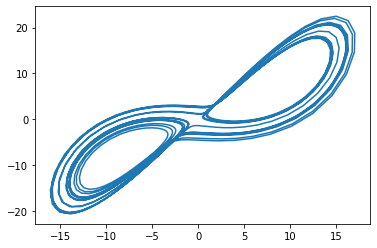

In [26]:
import matplotlib.pyplot as plt
# plt.plot(result[:,1], result[:,2])

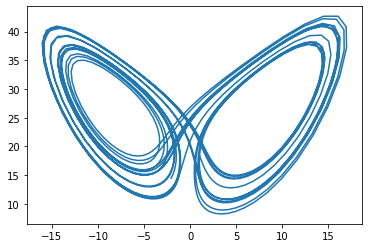

In [28]:
# plt.plot(result[:,1], result[:,3])

In [29]:
with open('lorenz.xml','w') as f:
    f.write(sbml)

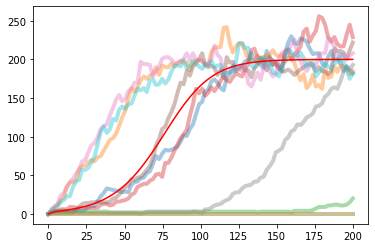

In [37]:
# from Juliano on Slack pc4covid19#general channel:
# https://github.com/covid-tissue-models/covid-tissue-response-models/tree/master/tellurium/simple_virus_model

# -*- coding: utf-8 -*-
"""
Created on Wed Nov 28 11:39:18 2018

@author: hsauro
"""

import tellurium as te
import roadrunner
import pylab


r = te.loada("""
         J1:  -> rcDNA;       k1*cccDNA
        rcDNA -> cccDNA;      k2*rcDNA
         J3:  -> envelope;    k3*cccDNA   
       cccDNA -> ;            k4*cccDNA
     envelope -> ;            k5*envelope
   rcDNA + envelope -> virus; k6*rcDNA*envelope

k1 = 1; k2 = 0.025;
k3 = 1000; k4 = 0.25
k5 = 2; k6 = 7.5E-6

cccDNA = 1; rcDNA = 0; envelope = 0
""")

md = r.simulate (0, 200, 100, ['time', 'rcDNA'])

r.seed = 124
for i in range(10):
    r.reset()
    m = r.gillespie (0, 200, 100, ['time', 'rcDNA'])
    pylab.plot(m['time'], m['rcDNA'], linewidth=4, alpha=0.4)
pylab.plot (md['time'], md['rcDNA'], color='red')
# pylab.plot(md['time'], md['virus'], color='cyan')
# print(md['virus'])
pylab.show()

In [39]:
sbml2= r.getSBML()
with open('virus.xml','w') as f:
    f.write(sbml2)

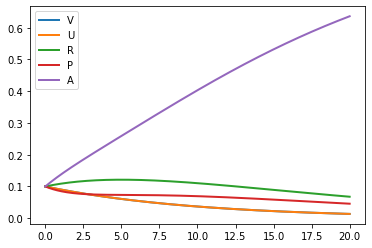

In [4]:
# from our coalition v2 preprint draft:
vm = te.loada("""
     V' = -r_u*V;
     U' = r_u*V - r_p*U;
     R' = r_p*U - lambda_r*R;
     P' = r_s*R - r_a*P - lambda_p*P;
     A' = r_a*P;
     
     V = 0.1;  U = 0.1;  R = 0.1; P = 0.1; A = 0.1;

     r_u = 0.1;  r_p = 0.2; lambda_r = 0.1; r_s = 0.3; r_a = 0.4; lambda_p = 0.1;
""")
result = vm.simulate (0, 20, 1000, ['time', 'V', 'U', 'R', 'P', 'A'])
vm.plot()

In [5]:
vm_sbml = vm.getSBML()
with open('virus_odes.xml','w') as f:
    f.write(vm_sbml)

In [9]:
import ipywidgets as widgets

w=widgets.Select(
    options=['Oxygen', 'Glucose', 'Energy'],
#     value='OSX',
    rows=10,
    description='SBML:',
    disabled=False
)
type(w.options)
display(w)

Select(description='SBML:', options=('Oxygen', 'Glucose', 'Energy'), rows=10, value='Oxygen')

In [10]:
type(w.options)

tuple

In [18]:
tmp=list(w.options)
tmp.append('foo')

In [19]:
w.options=tuple(tmp)

In [20]:
w

Select(description='SBML:', options=('Oxygen', 'Glucose', 'Energy', 'foo'), rows=10, value='Oxygen')